# NYPD Borough and Precinct Analysis

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# CSV path
nypd_csv = "Resources/NYPD_Arrest_Data__Year_to_Date_.csv"

#Read NYPD dataset
nypd_data = pd.read_csv(nypd_csv)
nypd_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238859078,01/09/2022,NaN,(null),NaN,(null),PL 2650022,M,B,49,0,25-44,M,BLACK HISPANIC,1021536,251417,40.856680,-73.865212,POINT (-73.865212 40.85668)
1,239923883,01/31/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
2,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
3,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
4,241038267,02/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [18]:
# Reduce the number of columns
nypd_data.drop(nypd_data.columns[[1,2,3,4,5,6,7,10,11,12,13,18]], axis=1, inplace=True)

In [67]:
# Rename columns
nypd_data_cleaned = nypd_data.rename(columns={"ARREST_BORO": "Borough", 
                                              "ARREST_PRECINCT": "Precinct Number"})

In [68]:
# Filter through data to prepare for charting
borough_groups = nypd_data_cleaned.groupby("Borough")
borough_data.index = ["The Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
borough_data_cleaned = borough_data.rename(columns={"ARREST_KEY": "Number of Arrests"})
borough_data_sorted = borough_data_cleaned.sort_values("Number of Arrests", ascending=False)

In [72]:
precinct_groups = nypd_data_cleaned.groupby("Precinct Number")
precinct_data = precinct_groups[["ARREST_KEY"]].count()
precinct_data_cleaned = precinct_data.rename(columns={"ARREST_KEY": "Number of Arrests"})

In [85]:
num_precincts = pd.DataFrame({
    "Number of Precincts": [23,22,12,16,4],
    "Number of Arrests": [38067, 34588, 32309, 29353, 6247]
})

In [86]:
num_precincts

,Number of Precincts,Number of Arrests
0,23,38067
1,22,34588
2,12,32309
3,16,29353
4,4,6247


In [89]:
x_values = num_precincts["Number of Precincts"]
y_values = num_precincts["Number of Arrests"]

In [43]:
# Display filtered Borough DataFrame
borough_data_sorted

,Number of Arrests
Brooklyn,38067
Manhattan,34588
The Bronx,32309
Queens,29353
Staten Island,6247


In [73]:
# Display filtered Precinct DataFrame
precinct_data_cleaned.head()

,Number of Arrests
Precinct Number,
1,1605
5,2087
6,1422
7,1543
9,1656


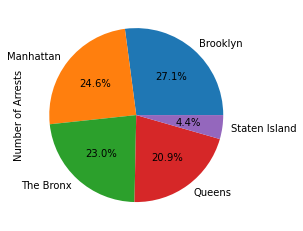

In [40]:
borough_pie_chart = borough_data_sorted.plot(kind="pie", subplots=True, legend=False, 
                                               autopct="%1.1f%%")

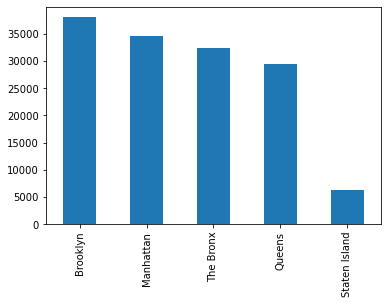

In [41]:
borough_bar_chart = borough_data_sorted.plot(kind="bar", legend=False)

Text(5.8, 0.8, 'y = 1456.15x + 5688.11')

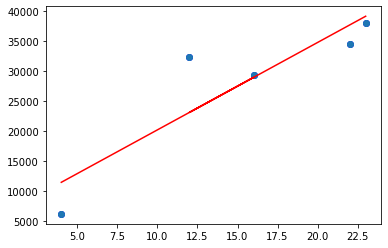

In [91]:
plt.scatter(num_precincts["Number of Precincts"], num_precincts["Number of Arrests"], color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")